In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

In [6]:
pip install yfinance

     |████████████████████████████████| 72 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 7.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     |████████████████████████████████| 4.6 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 11.4 MB/s eta 0:00:01
  Created wheel for peewee: filename=peewee-3.17.1-cp39-cp39-macosx_10_9_x86_64.whl size=252188 sha256=d17f3842b4b79a6150fb5c8700051c24101e55e35df20b05120ed28356a95a5e
  Stored in directory: /Users/shubham/Library/Caches/pip/wheels/77/ca/43/00120282a2aa9323dd8da301fb17ea79f84c35fc6faa9f94ea
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting

In [2]:
import yfinance as yf

In [7]:
print("imported")

imported


In [64]:
# import Infosys data\n",

data = yf.download('INFY', start = '2020-01-01', end = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [65]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,17.555913,17.715357,17.400661,17.562765,16.599591,9.438471e+06
std,4.834758,4.857840,4.809979,4.835666,4.736111,5.225127e+06
min,6.920000,7.190000,6.760000,6.940000,6.329522,1.320600e+06
25%,13.750000,13.887500,13.595000,13.797500,12.760139,5.828025e+06
50%,18.370001,18.559999,18.250000,18.415000,17.518204,8.103400e+06
75%,21.355000,21.460001,21.085000,21.260000,20.114308,1.164065e+07
max,26.150000,26.389999,25.580000,26.200001,24.964006,4.268660e+07


In [66]:
columns_to_4decimal = ['Open', 'High', 'Low', 'Close']


data[columns_to_4decimal] = np.round(data[columns_to_4decimal],4)
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,17.555913,17.715357,17.400661,17.562765,16.599591,9.438471e+06
std,4.834758,4.857840,4.809979,4.835666,4.736111,5.225127e+06
min,6.920000,7.190000,6.760000,6.940000,6.329522,1.320600e+06
25%,13.750000,13.887500,13.595000,13.797500,12.760139,5.828025e+06
50%,18.370000,18.560000,18.250000,18.415000,17.518204,8.103400e+06
75%,21.355000,21.460000,21.085000,21.260000,20.114308,1.164065e+07
max,26.150000,26.390000,25.580000,26.200000,24.964006,4.268660e+07


In [67]:
columns_to_drop = ['Adj Close']
data.drop(columns=columns_to_drop, inplace=True)

data.describe()

,Open,High,Low,Close,Volume
count,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,17.555913,17.715357,17.400661,17.562765,9.438471e+06
std,4.834758,4.857840,4.809979,4.835666,5.225127e+06
min,6.920000,7.190000,6.760000,6.940000,1.320600e+06
25%,13.750000,13.887500,13.595000,13.797500,5.828025e+06
50%,18.370000,18.560000,18.250000,18.415000,8.103400e+06
75%,21.355000,21.460000,21.085000,21.260000,1.164065e+07
max,26.150000,26.390000,25.580000,26.200000,4.268660e+07


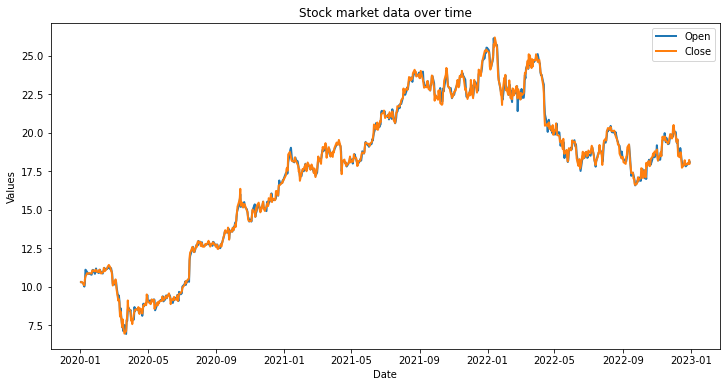

In [68]:
plt.figure(figsize=(12,6))
plt.plot(data['Open'], label='Open', linewidth=2)
plt.plot(data['Close'], label='Close', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock market data over time')
plt.legend()


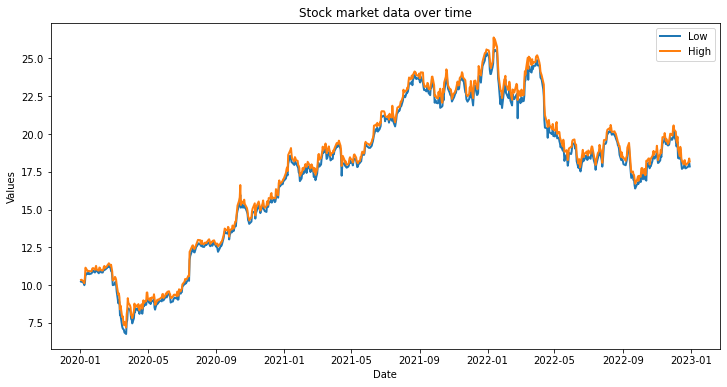

In [69]:
plt.figure(figsize=(12,6))
plt.plot(data['Low'], label='Low', linewidth=2)
plt.plot(data['High'], label='High', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock market data over time')
plt.legend()

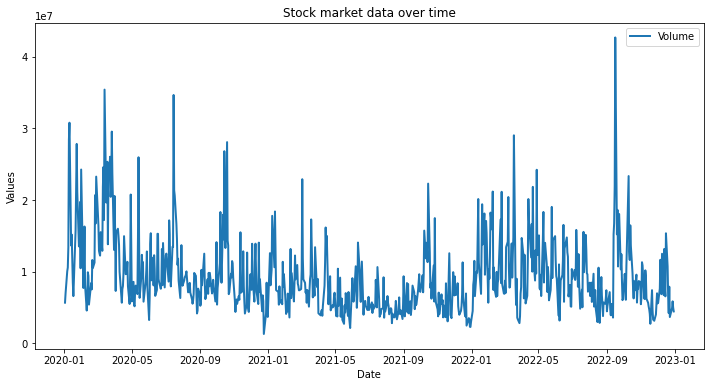

In [70]:
plt.figure(figsize=(12,6))
plt.plot(data['Volume'], label='Volume', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock market data over time')
plt.legend()

In [71]:
data.shape

(756, 5)

In [72]:
X = data[['Open', 'Low', 'High', 'Volume']]
y = data['Close']

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)


X_train shape (604, 4)
X_test shape (152, 4)
y_train shape (604,)
y_test shape (152,)


In [73]:
X_train

,Open,Low,High,Volume
Date,,,,
2020-11-03,14.23,14.20,14.46,4398900
2020-04-13,8.50,8.32,8.55,5684500
2021-04-23,17.81,17.77,17.96,4617800
2020-07-10,10.26,10.22,10.40,7959000
2020-03-06,9.96,9.59,10.04,15525700
...,...,...,...,...
2020-04-15,8.28,8.25,8.46,8004400
2020-06-04,9.24,9.18,9.39,15375600
2021-01-28,17.46,17.41,17.75,7877600


In [74]:
X_test

,Open,Low,High,Volume
Date,,,,
2021-08-16,23.55,23.32,23.61,3635400
2020-05-21,8.96,8.87,9.02,11336400
2021-09-08,23.34,23.12,23.41,4351700
2022-04-27,19.99,19.99,20.32,9754100
2022-05-24,18.49,18.25,18.57,9904800
...,...,...,...,...
2020-11-04,14.66,14.62,14.86,5624600
2022-08-02,19.48,19.44,19.62,6613000
2021-01-13,19.03,18.40,19.07,18409900


In [75]:
y_train

Date
2020-11-03    14.30
2020-04-13     8.50
2021-04-23    17.89
2020-07-10    10.39
2020-03-06     9.78
              ...  
2020-04-15     8.33
2020-06-04     9.27
2021-01-28    17.64
2021-09-23    23.73
2020-05-29     9.10
Name: Close, Length: 604, dtype: float64

In [76]:
y_test

Date
2021-08-16    23.40
2020-05-21     8.93
2021-09-08    23.19
2022-04-27    20.12
2022-05-24    18.40
              ...  
2020-11-04    14.68
2022-08-02    19.49
2021-01-13    18.43
2020-05-12     9.15
2022-01-24    22.94
Name: Close, Length: 152, dtype: float64

In [77]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#creates the svr model
svr_model = SVR(kernel = 'rbf', C=100, epsilon=0.1)


#train the model
svr_model.fit(X_train_scaled, y_train)


#make presictions on the test data
prediction = svr_model.predict(X_test_scaled)


#Evaluate the model
mse = mean_squared_error(y_test, prediction)
print(prediction)
print("Mean Squared Error:", mse)



[23.45373772  8.9339335  23.24173979 20.27063072 18.35031158  8.71280558
  7.233269    9.32458202 17.97620665 24.69639735 10.09282035 19.1843551
 19.24565938 22.18215374 22.97592989 18.36046986 18.14764432 22.28941854
 22.79934267 22.12193903 18.05521799 18.69149328 19.06108482 22.63173437
 22.47641478 22.74949105 22.69830842 18.40996193 18.6028895  12.69226722
 17.62818883 15.02461126 12.74758345  9.18098716 19.00602304 18.98156306
 23.05767712 17.88462803 18.16035983 19.7148375  25.1534042  23.85926611
  8.53084365 16.69229246 18.43434297 23.17488929 19.61187151 15.19603086
 15.51689288 17.95395198 11.31355506 18.40637616  8.8621505  20.46644581
 13.52017836 22.84525751 14.15525456 21.96925783 17.95092472 10.88173587
 18.60152653  9.27291213 11.22019545 20.24644481 23.27270589 20.67769954
 12.74458564 17.85171341 17.48466893 18.17751278  8.09801168 18.69254319
 22.47576643 15.48413995 22.70613911 18.40025195 18.57995696 18.21369927
 12.82833313  8.50440401 22.74165002  8.21749148 15.

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:
mae = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.1055906045623839


In [83]:
rrs = r2_score(y_test, prediction)
print("R2 score:", rrs)

R2 score: 0.9973698886266352


In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [98]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


#defines the parameter for grid search 
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, .1, 0.2, 0.5]
}
svr = SVR()

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
normal_pred = grid_search.fit(X_train_normalized, y_train)

best_params = grid_search.best_params_


#trains the model with the best parameter 
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_normalized, y_train)

prediction = best_svr_model.predict(X_test_normalized)


mse = mean_squared_error(y_test, prediction)


print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error: 0.013558245500364637


In [95]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, prediction)

accuracy_percentage = r2 * 100

print("R-Squared (Accuracy) in Percentage:", accuracy_percentage)






R-Squared (Accuracy) in Percentage: 99.94565782959081


In [96]:
mae = mean_absolute_error(y_test, prediction)
print("MAE:", mae)

MAE: 0.07854616898586239


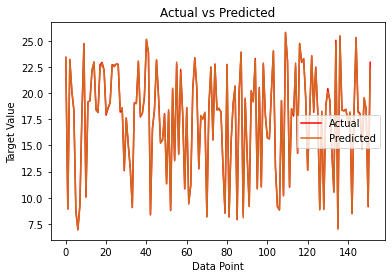

In [123]:
# Plot actual data
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')

# Plot predictions
plt.plot(range(len(prediction)), prediction, color='chocolate', label='Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [97]:
import pickle

In [99]:
with open('svm.pkl', 'wb') as file:
    pickle.dump(normal_pred, file)

In [100]:
with open('svm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [113]:
data2 = yf.download('AAPL', start='2021-02-01', end='2024-02-01')
sd=data2['Close']

[*********************100%%**********************]  1 of 1 completed


In [115]:
prediction = loaded_model.predict(sd)

ValueError: Expected 2D array, got 1D array instead:
array=[134.13999939 134.99000549 133.94000244 137.38999939 136.75999451
 136.91000366 136.00999451 135.38999939 135.13000488 135.36999512
 133.19000244 130.83999634 129.71000671 129.86999512 126.
 125.86000061 125.34999847 120.98999786 121.26000214 127.79000092
 125.12000275 122.05999756 120.12999725 121.41999817 116.36000061
 121.08999634 119.98000336 121.95999908 121.02999878 123.98999786
 125.56999969 124.76000214 120.52999878 119.98999786 123.38999939
 122.54000092 120.08999634 120.58999634 121.20999908 121.38999939
 119.90000153 122.15000153 123.         125.90000153 126.20999908
 127.90000153 130.36000061 133.         131.24000549 134.42999268
 132.02999878 134.5        134.16000366 134.83999634 133.11000061
 133.5        131.94000244 134.32000732 134.72000122 134.38999939
 133.58000183 133.47999573 131.46000671 132.53999329 127.84999847
 128.1000061  129.74000549 130.21000671 126.84999847 125.91000366
 122.76999664 124.97000122 127.44999695 126.26999664 124.84999847
 124.69000244 127.30999756 125.43000031 127.09999847 126.90000153
 126.84999847 125.27999878 124.61000061 124.27999878 125.05999756
 123.54000092 125.88999939 125.90000153 126.73999786 127.12999725
 126.11000061 127.34999847 130.47999573 129.63999939 130.1499939
 131.78999329 130.46000671 132.30000305 133.97999573 133.69999695
 133.41000366 133.11000061 134.77999878 136.33000183 136.96000671
 137.27000427 139.96000671 142.02000427 144.57000732 143.24000549
 145.11000061 144.5        145.63999939 149.1499939  148.47999573
 146.38999939 142.44999695 146.1499939  145.3999939  146.80000305
 148.55999756 148.99000549 146.77000427 144.97999573 145.63999939
 145.86000061 145.52000427 147.36000061 146.94999695 147.05999756
 146.13999939 146.08999634 145.6000061  145.86000061 148.88999939
 149.1000061  151.11999512 150.19000244 146.36000061 146.69999695
 148.19000244 149.71000671 149.61999512 148.36000061 147.53999329
 148.6000061  153.11999512 151.83000183 152.50999451 153.6499939
 154.30000305 156.69000244 155.11000061 154.07000732 148.97000122
 149.55000305 148.11999512 149.02999878 148.78999329 146.05999756
 142.94000244 143.42999268 145.8500061  146.83000183 146.91999817
 145.36999512 141.91000366 142.83000183 141.5        142.6499939
 139.13999939 141.11000061 142.         143.28999329 142.8999939
 142.80999756 141.50999451 140.91000366 143.75999451 144.83999634
 146.55000305 148.75999451 149.25999451 149.47999573 148.69000244
 148.63999939 149.32000732 148.8500061  152.57000732 149.80000305
 148.96000671 150.02000427 151.49000549 150.96000671 151.27999878
 150.44000244 150.80999756 147.91999817 147.86999512 149.99000549
 150.         151.         153.49000549 157.86999512 160.55000305
 161.02000427 161.41000366 161.94000244 156.80999756 160.24000549
 165.30000305 164.77000427 163.75999451 161.83999634 165.32000732
 171.17999268 175.08000183 174.55999756 179.44999695 175.74000549
 174.33000183 179.30000305 172.25999451 171.13999939 169.75
 172.99000549 175.63999939 176.27999878 180.33000183 179.28999329
 179.38000488 178.19999695 177.57000732 182.00999451 179.69999695
 174.91999817 172.         172.16999817 172.19000244 175.08000183
 175.52999878 172.19000244 173.07000732 169.80000305 166.22999573
 164.50999451 162.41000366 161.61999512 159.77999878 159.69000244
 159.22000122 170.33000183 174.77999878 174.61000061 175.83999634
 172.8999939  172.38999939 171.66000366 174.83000183 176.27999878
 172.11999512 168.63999939 168.88000488 172.78999329 172.55000305
 168.88000488 167.30000305 164.32000732 160.07000732 162.74000549
 164.8500061  165.11999512 163.19999695 166.55999756 166.22999573
 163.16999817 159.30000305 157.44000244 162.94999695 158.52000427
 154.72999573 150.61999512 155.08999634 159.58999634 160.61999512
 163.97999573 165.38000488 168.82000732 170.21000671 174.07000732
 174.72000122 175.6000061  178.96000671 177.77000427 174.61000061
 174.30999756 178.44000244 175.05999756 171.83000183 172.13999939
 170.08999634 165.75       167.66000366 170.3999939  165.28999329
 165.07000732 167.3999939  167.22999573 166.41999817 161.78999329
 162.88000488 156.80000305 156.57000732 163.63999939 157.6499939
 157.96000671 159.47999573 166.02000427 156.77000427 157.27999878
 152.05999756 154.50999451 146.5        142.55999756 147.11000061
 145.53999329 149.24000549 140.82000732 137.3500061  137.58999634
 143.11000061 140.36000061 140.52000427 143.77999878 149.63999939
 148.83999634 148.71000671 151.21000671 145.38000488 146.13999939
 148.71000671 147.96000671 142.63999939 137.13000488 131.88000488
 132.75999451 135.42999268 130.05999756 131.55999756 135.86999512
 135.3500061  138.27000427 141.66000366 141.66000366 137.44000244
 139.22999573 136.72000122 138.92999268 141.55999756 142.91999817
 146.3500061  147.03999329 144.86999512 145.86000061 145.49000549
 148.47000122 150.16999817 147.07000732 151.         153.03999329
 155.3500061  154.08999634 152.94999695 151.6000061  156.78999329
 157.3500061  162.50999451 161.50999451 160.00999451 166.13000488
 165.80999756 165.3500061  164.86999512 164.91999817 169.24000549
 168.49000549 172.1000061  173.19000244 173.02999878 174.55000305
 174.1499939  171.52000427 167.57000732 167.22999573 167.52999878
 170.02999878 163.61999512 161.38000488 158.91000366 157.22000122
 157.96000671 155.80999756 154.52999878 155.96000671 154.46000671
 157.36999512 163.42999268 153.83999634 155.30999756 152.36999512
 150.69999695 154.47999573 156.8999939  153.72000122 152.74000549
 150.42999268 150.77000427 151.75999451 149.83999634 142.47999573
 138.19999695 142.44999695 146.1000061  146.3999939  145.42999268
 140.08999634 140.41999817 138.97999573 138.33999634 142.99000549
 138.38000488 142.41000366 143.75       143.86000061 143.38999939
 147.27000427 149.44999695 152.33999634 149.3500061  144.80000305
 155.74000549 153.33999634 150.6499939  145.02999878 138.88000488
 138.38000488 138.91999817 139.5        134.86999512 146.86999512
 149.69999695 148.27999878 150.03999329 148.78999329 150.72000122
 151.28999329 148.00999451 150.17999268 151.07000732 148.11000061
 144.22000122 141.16999817 148.02999878 148.30999756 147.80999756
 146.63000488 142.91000366 140.94000244 142.6499939  142.16000366
 144.49000549 145.47000122 143.21000671 136.5        134.50999451
 132.36999512 132.30000305 135.44999695 132.22999573 131.86000061
 130.02999878 126.04000092 129.61000061 129.92999268 125.06999969
 126.36000061 125.01999664 129.61999512 130.1499939  130.72999573
 133.49000549 133.41000366 134.75999451 135.94000244 135.21000671
 135.27000427 137.86999512 141.11000061 142.52999878 141.86000061
 143.96000671 145.92999268 143.         144.28999329 145.42999268
 150.82000732 154.5        151.72999573 154.6499939  151.91999817
 150.86999512 151.00999451 153.8500061  153.19999695 155.33000183
 153.71000671 152.55000305 148.47999573 148.91000366 149.3999939
 146.71000671 147.91999817 147.41000366 145.30999756 145.91000366
 151.02999878 153.83000183 151.6000061  152.86999512 150.58999634
 148.5        150.47000122 152.58999634 152.99000549 155.8500061
 155.         157.3999939  159.27999878 157.83000183 158.92999268
 160.25       158.27999878 157.6499939  160.77000427 162.36000061
 164.8999939  166.16999817 165.63000488 163.75999451 164.66000366
 162.02999878 160.80000305 160.1000061  165.55999756 165.21000671
 165.22999573 166.47000122 167.63000488 166.6499939  165.02000427
 165.33000183 163.77000427 163.75999451 168.41000366 169.67999268
 169.58999634 168.53999329 167.44999695 165.78999329 173.57000732
 173.5        171.77000427 173.55999756 173.75       172.57000732
 172.07000732 172.07000732 172.69000244 175.05000305 175.16000366
 174.19999695 171.55999756 171.83999634 172.99000549 175.42999268
 177.30000305 177.25       180.08999634 180.94999695 179.58000183
 179.21000671 177.82000732 180.57000732 180.96000671 183.78999329
 183.30999756 183.94999695 186.00999451 184.91999817 185.00999451
 183.96000671 187.         186.67999268 185.27000427 188.05999756
 189.25       189.58999634 193.97000122 192.46000671 191.33000183
 191.80999756 190.67999268 188.61000061 188.08000183 189.77000427
 190.53999329 190.69000244 193.99000549 193.72999573 195.1000061
 193.13000488 191.94000244 192.75       193.61999512 194.5
 193.22000122 195.83000183 196.44999695 195.61000061 192.58000183
 191.16999817 181.99000549 178.8500061  179.80000305 178.19000244
 177.97000122 177.78999329 179.46000671 177.44999695 176.57000732
 174.         174.49000549 175.83999634 177.22999573 181.11999512
 176.38000488 178.61000061 180.19000244 184.11999512 187.6499939
 187.86999512 189.46000671 189.69999695 182.91000366 177.55999756
 178.17999268 179.36000061 176.30000305 174.21000671 175.74000549
 175.00999451 177.97000122 179.07000732 175.49000549 173.92999268
 174.78999329 176.08000183 171.96000671 170.42999268 170.69000244
 171.21000671 173.75       172.3999939  173.66000366 174.91000366
 177.49000549 178.99000549 178.38999939 179.80000305 180.71000671
 178.8500061  178.72000122 177.1499939  175.83999634 175.46000671
 172.88000488 173.         173.44000244 171.1000061  166.88999939
 168.22000122 170.28999329 170.77000427 173.97000122 177.57000732
 176.6499939  179.22999573 181.82000732 182.88999939 182.41000366
 186.3999939  184.80000305 187.44000244 188.00999451 189.71000671
 189.69000244 191.44999695 190.63999939 191.30999756 189.97000122
 189.78999329 190.3999939  189.36999512 189.94999695 191.24000549
 189.42999268 193.41999817 192.32000732 194.27000427 195.71000671
 193.17999268 194.71000671 197.96000671 198.11000061 197.57000732
 195.88999939 196.94000244 194.83000183 194.67999268 193.6000061
 193.05000305 193.1499939  193.58000183 192.52999878 185.63999939
 184.25       181.91000366 181.17999268 185.55999756 185.13999939
 186.19000244 185.58999634 185.91999817 183.63000488 182.67999268
 188.63000488 191.55999756 193.88999939 195.17999268 194.5
 194.16999817 192.41999817 191.72999573 188.03999329 184.3999939 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: x and y must have same first dimension, but have shapes (755,) and (152,)

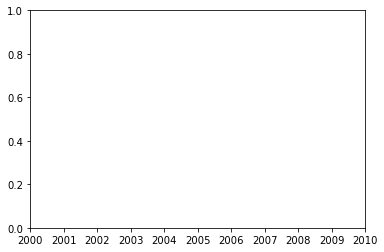

In [117]:
plt.plot(data2.index, prediction, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Predicted Stock Price')
plt.title('Predicted Stock Price over Time')
plt.legend()
plt.show()